<a href="https://colab.research.google.com/github/asepmuhidin/BD-DM-C02/blob/main/titanic_knn_classification_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Classification - KNN Model (Baseline)
### Created by Asep Muhidin, S.Kom., M.Kom.
### Mata Kuliah Data Mining Mei 2025

## Dataset Loading

In [ ]:
import pandas as pd
ffile="https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/refs/heads/main/dataset/titanic.csv"

dataset=pd.read_csv(ffile)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analisys

In [ ]:
#Jumah data
rows=dataset.shape[0]
cols=dataset.shape[1]
print(f'Number of Rows : {rows}')
print(f'Number of Columns : {cols}')

Number of Rows : 891
Number of Columns : 12


In [ ]:
#Jumlah penumpang selamat dan tidak selamat
dataset['Survived'].value_counts()

,count
Survived,
0,549
1,342


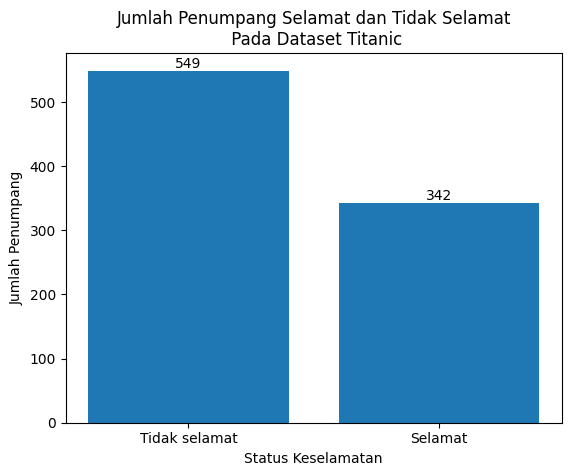

In [ ]:
# prompt: Tampilkan dalam bentuk grafik batang, pada sumbu x, label 0 menjadi "Tidak selamat" dan 1 "Selamat" dan munculkan nilai batang

import matplotlib.pyplot as plt

# Get the value counts of the 'Survived' column
survived_counts = dataset['Survived'].value_counts()

# Create labels for the x-axis
labels = ['Tidak selamat', 'Selamat']

# Create the bar plot
plt.bar(labels, survived_counts.values)

# Add the value of each bar on top of the bar
for i, count in enumerate(survived_counts.values):
    plt.text(i, count + 5, str(count), ha='center')

# Set the title and labels
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat\n Pada Dataset Titanic')
plt.xlabel('Status Keselamatan')
plt.ylabel('Jumlah Penumpang')

# Show the plot
plt.show()


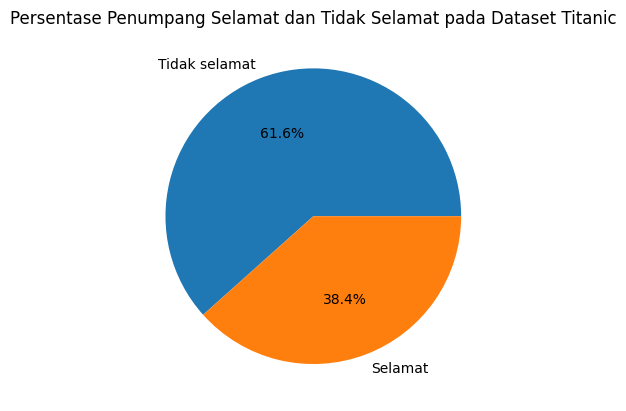

In [ ]:
# prompt: Tampilkan dalam bentuk pie chart , label 0 menjadi "Tidak selamat" dan 1 "Selamat" dan munculkan nilai

# Pie chart of survived counts
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')

# Add title
plt.title('Persentase Penumpang Selamat dan Tidak Selamat pada Dataset Titanic')

# Show the plot
plt.show()

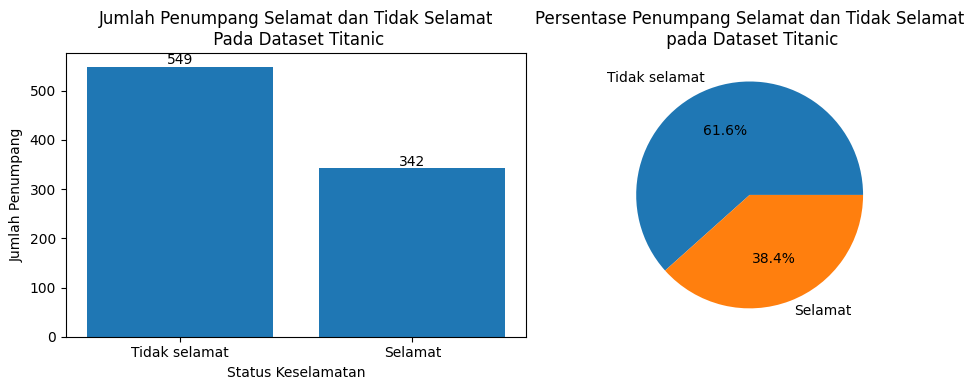

In [ ]:
# prompt: tampilkan 2 grafik tersebut dalam 1 baris 2 kolom dengan proporsi lebar yang sama

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4)) # Adjust figure size as needed

# First subplot (bar chart)
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.bar(labels, survived_counts.values)
for i, count in enumerate(survived_counts.values):
    plt.text(i, count + 5, str(count), ha='center')
plt.title('Jumlah Penumpang Selamat dan Tidak Selamat\n Pada Dataset Titanic')
plt.xlabel('Status Keselamatan')
plt.ylabel('Jumlah Penumpang')

# Second subplot (pie chart)
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.pie(survived_counts, labels=labels, autopct='%1.1f%%')
plt.title('Persentase Penumpang Selamat dan Tidak Selamat\n pada Dataset Titanic')

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

In [ ]:
#Berapa jumlah penumpang pada tiap kelas
dataset['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


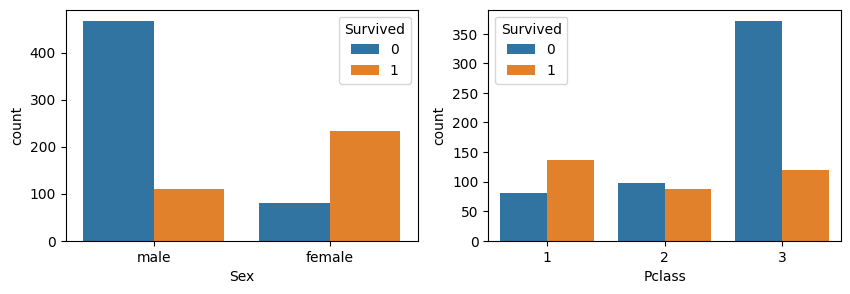

In [ ]:
#Butkan saya grafik batang menggunakan seaborn
import seaborn as sns
fig,axs=plt.subplots(1,2,figsize=(10,3))
sns.countplot(x='Sex',data=dataset, ax=axs[0],hue='Survived')
sns.countplot(x='Pclass',data=dataset, ax=axs[1],hue='Survived');


## Preprocessing

In [ ]:
#handle null value and Impute

dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Drop Cabin Column
dataset.drop('Cabin',axis=1,inplace=True)

In [ ]:
#Most Frequnet Cabin
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
#Impute Age Column with average and Embarked with 'S'
dataset.fillna({
    'Age':dataset['Age'].mean(),
    'Embarked':'S'
},inplace=True)

In [ ]:
#Check dataset
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Label Encoding (Sex, Embarked)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])


In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature and  Label(Class) Splitting

In [ ]:
X=dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=dataset['Survived']

## Train- Test Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True, stratify=y)

## KNN Modeling (Training)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Evaluation Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'Precision : {precision_score(y_test,y_pred)}')
print(f'Recall : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

[[86 24]
 [31 38]]
Accuracy : 0.6927374301675978
Precision : 0.6129032258064516
Recall : 0.5507246376811594
F1 Score : 0.5801526717557252
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       110
           1       0.61      0.55      0.58        69

    accuracy                           0.69       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.69      0.69      0.69       179



## Bagaimana cara mengimprove Model --- SEE U NEXT WEEK